# Continueing work on incorperating Batching - batched data - into the pipeline.
### This notebook will also continue the work with Pandas at getting the tats for the unbatched data.

Thoughts are still on
1. changing up the model architecture as the Wrok done by Kemal (removing layers from the VGG16 model, works better. here could be some assessment on what Changes I made to make my models and why these didn't work out so well)
2. Removing and weighting the colour channels
3. When learning, ants will see the fist section of the route the most, second second most and so on - we could introduce this method into our model learning? how does this affect the learning of the model, what Changes (neeed point 1. to be done first, want to go forth with the best ground base)

[Working File 2cl BATCHING](/notebooks/antvis/antvis/optics/vgg_16_finetune_bigloop_2c2l-BATCHING.ipynb)

# Tables
2c2l model. batch size of 32 (semi random, worked for Kemal, may well be the batch size of VGG16)

Memory Issues, change 32 to 15
 still tooo bug, reduced to batch of 5

|Res (x,y)|pad|f lin lay|
|---------|--|---------|
|452,144|5||
|226,72|5||
|113,36|2||
|57,18|1||
|29,9|0||
|15,5|0||
|8,3|0||


Model sizes

[Estimating model size](https://jck.bio/pytorch_estimating_model_size/)

##### UNITS!!

In [5]:
def choose_model(model_name, lin_lay, dropout):

    if model_name == '4c3l':
        return smallnet1(in_chan=3, f_lin_lay=int(lin_lay), l_lin_lay=11, ks= (3,5), dropout= dropout)
    elif model_name == '3c2l':
        return smallnet2(in_chan=3, f_lin_lay=int(lin_lay), l_lin_lay=11, ks = (3,5), dropout=dropout)
    elif model_name == '2c2l':
        return smallnet3(in_chan=3, f_lin_lay=int(lin_lay), l_lin_lay=11, ks= (3,5), dropout= dropout)
    elif model_name == '7c3l':
        return sevennet(in_chan=3, f_lin_lay=int(lin_lay), l_lin_lay=11, ks= (3,5), dropout= dropout)
    elif model_name == 'vgg16':
        model_vgg16 = vgg16(weights="IMAGENET1K_V1")
        vgg_feats = model_vgg16.features
        vgg_classifier = model_vgg16.classifier
        vgg_classifier.pop(6)

        vgg = nn.Sequential(
            vgg_feats,
            Flattern(),
            vgg_classifier,
            nn.Linear(4096,11),
            nn.Softmax(dim=0),
            )
        return vgg
    else:
        print('Model Name Not Recognised')

In [6]:
import sys
import numpy as np
sys.path.append('../.')
from architectures import sevennet, smallnet1, smallnet2, smallnet3 
#from fns4wandb import choose_model

bits = 32
input_size_452_b1 =(1,3,144,452) #batch, channels, h, w
input_size_452_b32 =(32,3,144,452) #batch, channels, h, w

input_size_226_b1 =(1,3,72,226) #batch, channels, h, w
input_size_226_b32 =(32,3,72,226) #batch, channels, h, w

input_bits_452_b1 = np.prod(input_size_452_b1)*bits
print("size of 452,144 batch size of 1  ",input_bits_452_b1, ' bits')
input_bits_452_b32 = np.prod(input_size_452_b32)*bits
print("size of 452,144 batch size of 32 ",input_bits_452_b32, ' bits')

input_bits_226_b1 = np.prod(input_size_226_b1)*bits
print("size of 226,72  batch size of 1  ",input_bits_226_b1, ' bits')
input_bits_226_b32 = np.prod(input_size_226_b32)*bits
print("size of 226,72  batch size of 32 ",input_bits_226_b32, ' bits')

#mod_sev = choose_model('7c3l', 248832,0)
mod_2_452 = choose_model('2c2l', 33767424,0)
mod_2_452_2 = choose_model('2c2l', 33767424,0.5)
mod_2_226 = choose_model('2c2l', 267264,0)
mod_2_113 = choose_model('2c2l', 64512,0)
mod_2_57 = choose_model('2c2l', 15552,0)
mod_2_29 = choose_model('2c2l', 3072,0)
mod_2_15 = choose_model('2c2l', 640,0)
mod_2_8 = choose_model('2c2l', 128,0)

def check_model_sizes_bits(model):
    mods = list(model.modules())
    sizes = []
    total_bits = 0
    
    for i in range(1,len(mods)):
        m = mods[i]
        p = list(m.parameters())
        for j in range(len(p)):
            sizes.append(np.array(p[j].size()))
    
    for i in range(len(sizes)):
        s = sizes[i]
        bitz = np.prod(np.array(s))*bits
        total_bits += bitz
    total_bytes = total_bits/8
    total_megabytes = total_bytes/1e+6
    total_gigabytes = total_megabytes/1000
    print(total_bits, 'bits    ', total_bytes, "bytes    ", total_megabytes, "MegaBytes    ", total_gigabytes,"GigaBytes") # 148480


print("model 2c2l, input size: 452,144")
check_model_sizes_bits(mod_2_452)
print("model 2c2l, input size: 452,144 iwht .5 dropout")
check_model_sizes_bits(mod_2_452_2)

print("model 2c2l, input size: 226,72")
check_model_sizes_bits(mod_2_226)
print("model 2c2l, input size: 113,36")
check_model_sizes_bits(mod_2_113)
print("model 2c2l, input size: 57,18")
check_model_sizes_bits(mod_2_57)
print("model 2c2l, input size: 29,9")
check_model_sizes_bits(mod_2_29)
print("model 2c2l, input size: 15,5")
check_model_sizes_bits(mod_2_15)
print("model 2c2l, input size: 8,3")
check_model_sizes_bits(mod_2_8)

size of 452,144 batch size of 1   6248448  bits
size of 452,144 batch size of 32  199950336  bits
size of 226,72  batch size of 1   1562112  bits
size of 226,72  batch size of 32  49987584  bits
model 2c2l, input size: 452,144
216113655488 bits     27014206936.0 bytes     27014.206936 MegaBytes     27.014206935999997 GigaBytes
model 2c2l, input size: 452,144 iwht .5 dropout
216113655488 bits     27014206936.0 bytes     27014.206936 MegaBytes     27.014206935999997 GigaBytes
model 2c2l, input size: 226,72
1712631488 bits     214078936.0 bytes     214.078936 MegaBytes     0.214078936 GigaBytes
model 2c2l, input size: 113,36
415018688 bits     51877336.0 bytes     51.877336 MegaBytes     0.051877336 GigaBytes
model 2c2l, input size: 57,18
101674688 bits     12709336.0 bytes     12.709336 MegaBytes     0.012709336 GigaBytes
model 2c2l, input size: 29,9
21802688 bits     2725336.0 bytes     2.725336 MegaBytes     0.002725336 GigaBytes
model 2c2l, input size: 15,5
6237888 bits     779736.0 b

 from ptrblk [finding model size](https://discuss.pytorch.org/t/finding-model-size/130275/2)

In [7]:
#

def ptrblk_fin_mod_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    size_all_gb = size_all_mb/953.674
    print('model size: {:.3f}MB'.format(size_all_mb))
    print('model size: {:.3f}GB'.format(size_all_gb))


ptrblk_fin_mod_size(mod_2_452)

model size: 12881.378MB
model size: 13.507GB


In [8]:
pip install pytorch_modelsize

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pytorch_modelsize (from versions: none)
ERROR: No matching distribution found for pytorch_modelsize
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pytorch_modelsize import SizeEstimator

se = SizeEstimator(mod_2_452, input_size=(1,3,452,144))
print(se.estimate_size())

ModuleNotFoundError: No module named 'pytorch_modelsize'

# MEMORY PROBLEM

hiccup - memory problem/ 420G in optics - probably from too many saves. cleaning up excess Files is taking tiiime

Talking to Claude about the problem. here is what I've found

pkl files do not use the GPU/CUDA memory, they are stored in RAM or on the disk.

pytorch has a [function](https://pytorch.org/tutorials/recipes/recipes/save_load_across_devices.html) to save models using pkl, the function transfers the models to cpu before storage <-- transfer pkl saving to this. trusted function. torch.save(model.state_dict, path) ; loading is similar to pkl: device = torch.device('cuda') model = Net() {need skeleton of model} model.load_state_dict(torch.load(path)) model.to(device)


recap on shallow and deep copies
main difference - for shallow: save a var, later edit var = saved var will have the new changes.
                - for deep:    save a var, later edit var - saved var will not have new changes. will be as is when saved. -- hp sweep saving best model -temi.




IDSWDataSet. before - image tensor to device, label not but was float 32.
have changed it so that both are .to(device)

REMOVE .TO(DEVICE) FROM BATCH_LOOP FN!



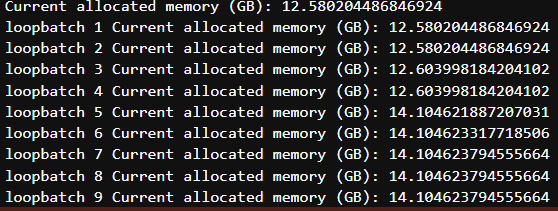

The 12.58 GB is the model itself

Between 4 and 5 is the model prediction/ forward pass

Between 9 and 10 is optimizer.zero_grad ; loss.backward ; optimizer.step

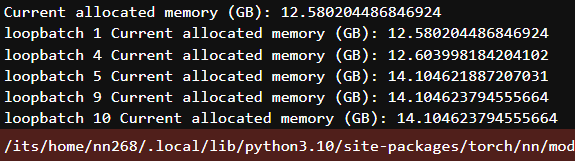

Between 10 and 11 is loss.backward


1st.  and largest (so far seen) incease in memory is the model
2nd. increase is due to the forward pass
3rd. incease is due to loss going back.

HOWEVER these do not explain the full error message that there is already a lot of the CUDA memory being used up by something else...

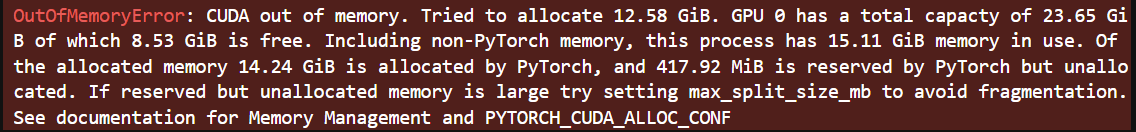

tried to allocate 12.58 GB -- that's the Model

Total capacity of 23.65 GB. sounds goog

But only 8.53 GB Free?? :O

15.11 GB in use ... 14.24 GB of that is allocated by pytorch...

What is using this memory and where is it?

AND why was this not a problem before?


and what if I change the batch size down from 32?

trying batch size of 16


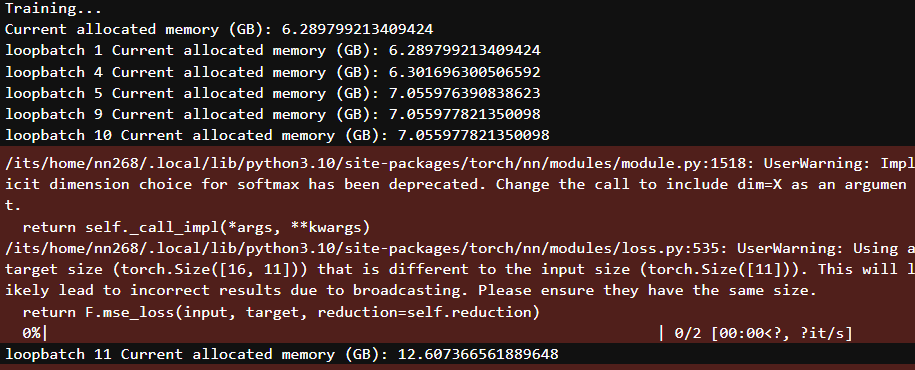

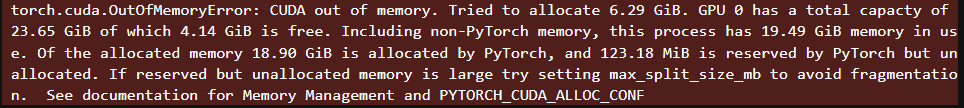

So here we have a smaller allocation of memory.
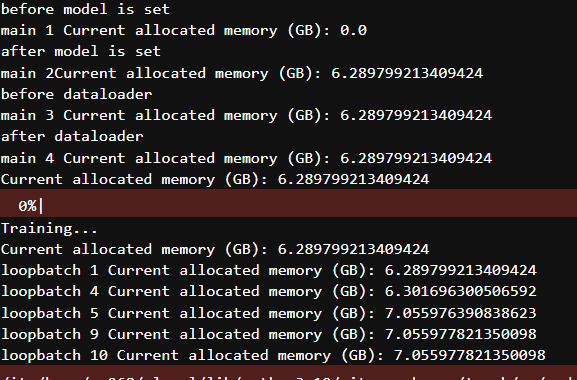

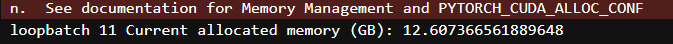

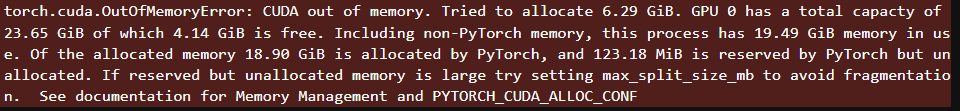

So here. batch size of 16.
needs different first linear layer size
f lin lay is used when creating model - so affects the model size.

we are now trying to allocate 6.29 GB.
same total capacity of 23.65 GB

but somehow less is free than if we were asking for more..?
4.14 GB

19.49 GB in use.

 when trying a batch size of 32, 8.53 GB was free
 have now halved the batch size: 16, 4.14 GB was free

In [ ]:
freeat32 = 8.53
freeat16 = 4.14
print("Difference in free memory between batch size 32 and 16 is :",freeat32 - freeat16, " GB")

print('Is that half?')
print(8.53/2, ' GB')


meminuse32 = 15.11
meminuse16 = 18.9
print("Difference in how huch memory is already in use betweeen batch size 32 and 16 GB :")
print(meminuse32-meminuse16, ' GB')
print("More memory is tied up if we want to use less of it at batch size 16")

### Exploring example from [machinelearningmastery](https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/)


In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as Pd
import torch
from torch.Utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import torch.Nn as Nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


# Read data, convert to NumPy arrays
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 
  
# data (as pandas dataframes) 
X = connectionist_bench_sonar_mines_vs_rocks.data.features
X=X.to_numpy()
y = connectionist_bench_sonar_mines_vs_rocks.data.targets 
y=y.to_numpy()
#print(type(X))
#print(type(y))
# Metadata 

#print(connectionist_bench_sonar_mines_vs_rocks.Metadata) 
# variable information 
#print(connectionist_bench_sonar_mines_vs_rocks.variables) 

 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
 
# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)
 
# create model
model = nn.Sequential(
    nn.Linear(60, 60),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 1),
    nn.Sigmoid()
)
 
# Train the model
n_epochs = 200
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(y_pred.shape) # me # torch.Size([16, 1])
        #print(y_batch.shape) # me # torch.Size([16, 1])
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))


In [ ]:
from torchvision.models import vgg16

In [ ]:
def check_model_sizes_bits(model):
    bits = 32
    mods = list(model.modules())
    sizes = []
    total_bits = 0
    
    for i in range(1,len(mods)):
        m = mods[i]
        p = list(m.parameters())
        for j in range(len(p)):
            sizes.append(np.array(p[j].size()))
    
    for i in range(len(sizes)):
        s = sizes[i]
        bitz = np.prod(np.array(s))*bits
        total_bits += bitz
    total_bytes = total_bits/8
    total_megabytes = total_bytes/1e+6
    total_gigabytes = total_megabytes/1000
    print(total_bits, 'bits    ', total_bytes, "bytes    ", total_megabytes, "MegaBytes    ", total_gigabytes,"GigaBytes") # 148480


def ptrblk_fin_mod_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    size_all_gb = size_all_mb/953.674
    print('model size: {:.3f}MB'.format(size_all_mb))
    print('model size: {:.3f}GB'.format(size_all_gb))

In [ ]:
vg_mod = vgg16(weights="IMAGENET1K_V1")

check_model_sizes_bits(vg_mod)
ptrblk_fin_mod_size(vg_mod)

vgg is size:                             0.553GB                    1/2 a GB

2c2l expected input of 452,144 is size: 12.607366561889648 (GB)     12 GB

Something is very wrong here

In [ ]:
from architectures import smallnet3

mod3 = smallnet3(in_chan=3, f_lin_lay=int(64512), l_lin_lay=11, ks= (3,5), dropout= 0.5)

print("2c2l expecting a resolution of [113,36]")
check_model_sizes_bits(mod3)
ptrblk_fin_mod_size(mod3)



mod32 = smallnet3(in_chan=3, f_lin_lay=int(1055232), l_lin_lay=11, ks= (3,5), dropout= 0.5)
print("2c2l expecting a resolution of [452,144]")
check_model_sizes_bits(mod32)
ptrblk_fin_mod_size(mod32)

2c2l expecting an image size of 452,144 is 402.667MB.

vgg16 expecting an image size of 224,224 is 527.792MB


Batching appear to increase model size considerably  (12.6 GB)

Investigation question 120424

batching with vgg16, how does this affect size and memory use

In [ ]:
model_vgg16 = vgg16(weights="IMAGENET1K_V1")
print("features  ",model_vgg16.features)

print("classifier  ", model_vgg16.classifier)

"""vgg_feats = model_vgg16.features
vgg_classifier = model_vgg16.classifier
vgg_classifier.pop(6)

vgg = nn.Sequential(
    vgg_feats,
    Flattern(),
    vgg_classifier,
    nn.Linear(4096,11),
    nn.Softmax(dim=0),
    )"""


features   Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


classifier
Sequential(
  (0): Linear(in_features=25088, out_features=409



RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x229376 and 25088x4096)  

In [ ]:
25088 - 229376

In [ ]:
me_giving = (229376)
vgg_expecting = (25088)#*4096)

print(me_giving - vgg_expecting)

In [ ]:
import torch
import torch.nn as nn
from architectures import PrintLayer
lin_lay = 1032192
class VGG16Smaller(nn.Module):
            def __init__(self, num_classes=11):
                super(VGG16Smaller, self).__init__()
                self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(64),
                    nn.ReLU())
                self.layer2 = nn.Sequential(
                    nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(64),
                    nn.ReLU(), 
                    nn.MaxPool2d(kernel_size = 2, stride = 2))
                self.layer3 = nn.Sequential(
                    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(128),
                    nn.ReLU())
                self.layer4 = nn.Sequential(
                    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(128),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size = 2, stride = 2))
                self.layer5 = nn.Sequential(
                    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(256),
                    nn.ReLU())
                self.layer6 = nn.Sequential(
                    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(256),
                    nn.ReLU())
                self.layer7 = nn.Sequential(
                    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(256),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size = 2, stride = 2))
                self.fc = nn.Sequential(
                    nn.Dropout(0.5),
                    nn.Linear(lin_lay, 4096), # 1032192 and 4096x4096)
                    nn.ReLU())
                self.fc1 = nn.Sequential(
                    nn.Dropout(0.5),
                    nn.Linear(4096, 4096),
                    nn.ReLU())
                self.fc2= nn.Sequential(
                    nn.Linear(4096, num_classes))
                
            def forward(self, x):
                out = self.layer1(x)
                out = self.layer2(out)
                out = self.layer3(out)
                out = self.layer4(out)
                out = self.layer5(out)
                out = self.layer6(out)
                out = self.layer7(out)
                PrintLayer()
                #out = out.reshape(out.size(0), -1)
                out = out.flatten()
                PrintLayer()
                out = self.fc(out)
                out = self.fc1(out)
                out = self.fc2(out)
                return out
vgg = VGG16Smaller()

testing kemals code below

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import pickle
from datetime import datetime
import torch.optim.lr_scheduler as sch
import torch.nn.functional as F

%env CUDA_LAUNCH_BLOCKING=1
#%env TORCH_USE_CUDA_DSA

#torch.cuda.empty_cache()
import os
print(os.environ.get('CUDA_LAUNCH_BLOCKING'))

#!set CUDA_LAUNCH_BLOCKING=1

data_path =  r'/its/home/nn268/antvis/antvis/optics/AugmentedDS_IDSW/'
_save_location = r'/its/home/nn268/antvis/antvis/optics/res_big_loop_saves/models/batch/testing/'
seed = random.seed(1)


def get_data(directory_path):
    #print(directory_path)
    expected = ['00','01','02','03','04','05','06','07','08','09','10','11']
    should = ['0','1','2','3','4','5','6','7','8','9','10']

    labels = []
    data_file_path = []

    directory = os.fsencode(directory_path)
    #print("directory;   ",directory)
        
    for file in os.listdir(directory):
        
        filename = os.fsdecode(file)
        #print(filename[0:4])
        if filename[0:4] == 'IDSW':
            #print("filename  ",filename)
            #print(filename[5:7])
            if filename[5:7] not in expected:
                print('problem name   ', filename)
            #[print(filename) if int(filename[5:7]) not in expected]# (int(filename[5:7]) - 1)
            data_file_path.append(directory_path+"/"+filename)
            j = (int(filename[5:7]) - 1)
            #print('j  ', j)
            if str(j) not in should:
                #print(j)
                print('problem name   ',filename)
            labels.append(int(filename[5:7]) - 1)
    print(len(labels))
    print(np.unique(labels))
    print(len(data_file_path))
    return data_file_path, labels



def train_test_validation_split(image_paths, labels, seed):

    x_remainder_train, test_data, y_remainder_train, test_labels = train_test_split(image_paths, labels, test_size=0.3, random_state=seed)
    train_data, validation_data, train_labels, validation_labels = train_test_split(x_remainder_train, y_remainder_train, test_size=0.1, random_state=seed)

    return train_data, train_labels, test_data, test_labels, validation_data, validation_labels




def padding(img, pad_size):
		left_x = img[:,:pad_size,:] # h, w, c
		right_x = img[:,-pad_size:,:]
		y = img.shape[0]
		x = img.shape[1]+(pad_size*2)
		new_x = np.full((y, x, 3),255) # h w c
		new_x[:,:pad_size,:] = right_x
		new_x[:,pad_size:-pad_size,:] = img
		new_x[:,-pad_size:,:] = left_x
		return new_x



def image_processing(image_paths):

    processed_images = []

    for image_path in image_paths:

        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (226, 72))
        processed_img = padding(resized_img, 5)
        im_chan = processed_img.shape[2]
        imgY, imgX = processed_img.shape[0], processed_img.shape[1]
        processed_img_tensor = torch.tensor(processed_img, dtype = torch.float32)#, device=mps_device, dtype = torch.float32)
        
        #processed_img_tensor = processed_img_tensor.to(mps_device)
        normalized_tensor = torch.nn.functional.normalize(processed_img_tensor) 
        permuted_tensor = normalized_tensor.permute(2, 0, 1)

        tensor = permuted_tensor.reshape(im_chan, imgY, imgX)
        #tensor.to(mps_device)
        processed_images.append(tensor)

    return processed_images



class VGG16Smaller(nn.Module):
    def __init__(self, num_classes=11):
        super(VGG16Smaller, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(66816, 4096), #135936
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = out.reshape(out.size(0), -1)
        out = out.flatten(start_dim=1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = F.log_softmax(out, dim=1) 
        return out



def learning_curve(t_loss):
    font1 = {'family':'serif','color':'darkblue','size':16}
    font2 = {'family':'serif','color':'darkblue','size':15}
    
    plt.plot(range(len(t_loss)), t_loss, label ='Training loss')
    plt.title("\n Learning Curve ", font1)
    plt.xlabel('Epochs', font2)
    plt.ylabel('Loss', font2)
    #plt.yscale("log")
    plt.legend()
    # if save_location != None:
    #     plt.savefig(save_location+'/'+lab+'.png') #run_name
    # else:
    #     print("Save Location Not Specified!")
    plt.show()


def accuracy_curve(v_accuracy_list, t_accuracy_list, save_location,run_name:str):
    lab = "Accuracy Curve"+run_name
    font1 = {'family':'serif','color':'darkblue','size':16}
    font2 = {'family':'serif','color':'darkblue','size':15}

    plt.title(run_name+"\n Accuracy Curve", font1)
    plt.plot(range(len(t_accuracy_list)), t_accuracy_list, label ='Training accuracy')
    plt.plot(range(len(v_accuracy_list)), v_accuracy_list, label='Validation accuracy')
    plt.xlabel('Epochs', font2)
    plt.ylabel('Accuracy', font2)
    plt.legend()
    # if save_location != None:
    #     plt.savefig(save_location+lab+'.png', format='png')
    # else:
    #     print("Save Location Not Specified!")
    plt.show()






def main():

    mps_device = "cuda:0" if torch.cuda.is_available() else "cpu"
    print(mps_device)


    image_paths, labels = get_data(data_path)
    train_data, train_labels, test_data, test_labels, validation_data, validation_labels = train_test_validation_split(image_paths,labels,seed)
    
    train_data = image_processing(train_data)
    test_data = image_processing(test_data)
    validation_data = image_processing(validation_data)
    
    
    batch_size = 8
    
    train = []
    test = []
    val = []
    
    for i, data in enumerate(train_data):
        train.append((data, train_labels[i]))
    
    for i, data in enumerate(test_data):
        test.append((data, test_labels[i]))
    
    for i, data in enumerate(validation_data):
        val.append((data, validation_labels[i]))
    
    dataloaders = {
        'train': DataLoader(train, batch_size=batch_size, shuffle=True),
        'val': DataLoader(val, batch_size=batch_size, shuffle=True),
        'test': DataLoader(test, batch_size=batch_size, shuffle=True)
    }
    
    model = VGG16Smaller()
    print(mps_device)
    #model = model.to(mps_device) ####
    
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1.00E-05, weight_decay= 4e-5)
    schedulr = sch.ExponentialLR(optimizer, gamma=0.9)
    
    
    training_losses = []
    
    #TRAIN WITH MPS DEVICE
    for epoch in range(50):  # loop over the dataset multiple times
    
        running_loss = 0.0
        t_loss = 0.0
        for i, data in enumerate(dataloaders['train'], 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            #print("labels : ",labels, labels.shape)
            #print("inputs shape: ", inputs.shape)
            
            #plt.plot(inputs)
            #print(labels)
            #print(mps_device)
            #inputs = inputs.to(mps_device)
            #labels = labels.to(mps_device)
    
            #labels = labels.to(mps_device)
    
            # zero the parameter gradients
            optimizer.zero_grad()
    
            # forward + backward + optimize
            #print(inputs.shape)
            outputs = model(inputs)
            #print(outputs.shape)
            #print(outputs.argmax())
            #outputs = outputs.view(-1, 10)
            #labels = labels.view(-1)
            #print(outputs.shape)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            # print statistics
            running_loss += loss.item()
            if i % 10 == 9:    # print every 2000 mini-batches
                t_loss += running_loss
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
                running_loss = 0.0
    
        schedulr.step()
        training_losses.append(t_loss / len(dataloaders['train']))
    
    
    current_dateTime = str(datetime.now().minute)+""+str(datetime.now().day)+""+str(datetime.now().month)+""+str(datetime.now().year)
    filename = _save_loacation+ f'/{current_dateTime}.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print('Finished Training')
    
    
def testing():
    correct = 0
    total = 0
    count = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in dataloaders['test']:
            images, labels = data
            #labels = labels.to(mps_device)
            count += len(images)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Accuracy of the network on the {count} test images: {100 * correct // total} %')
    
    
    
    
    learning_curve(training_losses)

main()


Took some debugging, but have gotten kemals code to work and I think in the process worked out where I've been going wrong with mine

In [ ]:
def get_data(directory_path):
    #print(directory_path)
    expected = ['00','01','02','03','04','05','06','07','08','09','10','11']
    should = ['0','1','2','3','4','5','6','7','8','9','10']

    data_file_path = []
    labels = []

    directory = os.fsencode(directory_path)
    #print("directory;   ",directory)
        
    for file in os.listdir(directory):
        #print(' ')
        filename = os.fsdecode(file)
        #print(filename[0:4])
        if filename[0:4] == 'IDSW':
            #print("filename  ",filename)
            #print(filename[5:7])
            if filename[5:7] not in expected:
                print('problem name   ', filename)
            #[print(filename) if int(filename[5:7]) not in expected]# (int(filename[5:7]) - 1)
            data_file_path.append(directory_path+"/"+filename)
            #print("a ",int(filename[5:7]))
            j = (int(filename[5:7]) - 1)
            #if int(j)<=0:
            #    print(j, 'h')
            #if int(j)>=11:
            #    print(j, 'j')
            #print('j  ', j)
            if str(j) not in should:
                #print(j)
                print('problem name   ',filename)
            labels.append(j)#int(filename[5:7]) - 1)
    print(labels.count(0))
    print(labels.count(1))
    print(labels.count(2))
    print(labels.count(3))
    print(labels.count(4))
    print(labels.count(5))
    print(labels.count(6))
    print(labels.count(7))
    print(labels.count(8))
    print(labels.count(9))
    print(labels.count(10))
    print(labels.count(11))
    #print(labels)
    #print(directory_path)
    #print(data_file_path)
    return data_file_path, labels




d, l = get_data(r'/its/home/nn268/antvis/antvis/optics/AugmentedDS_IDSW/')